In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# Grab the electrode locations
f = h5py.File('RM1_p45_day4_trial_1_PAINT.mat', 'r')

phi = np.zeros(f['cfg_PAINT_cond']['chanlocs']['sph_phi'].size)
theta = np.zeros(phi.shape)
radius = np.zeros(phi.shape)
for i, ref in enumerate(f['cfg_PAINT_cond']['chanlocs']['sph_phi']):
    phi_ref = ref[0]
    theta_ref = f['cfg_PAINT_cond']['chanlocs']['sph_theta'][i][0]
    radius_ref = f['cfg_PAINT_cond']['chanlocs']['sph_radius'][i][0]
    
    phi[i] = f[phi_ref][0][0] * np.pi/180
    theta[i] = f[theta_ref][0][0] * np.pi/180
    radius[i] = f[radius_ref][0][0]
    
# Convert from spherical to Cartesian coordinates (I found that doing this does not exactly match up with the x, y, z
# values given in the data strcucture)
x = radius * np.sin(phi) * np.cos(theta)
y = radius * np.sin(phi) * np.sin(theta)
z = radius * np.cos(phi)

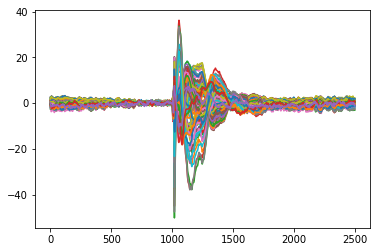

In [4]:
TEP = f[f['cfg_PAINT_cond']['ChanTEP'][0][0]]
plt.plot(TEP.)

In [79]:
times[750:-1000].size

750

In [98]:
# vals is the scalar field you want to plot. In this case a single frame of the TEP data:
TEP = f[f['cfg_PAINT_cond']['ChanTEP'][0][0]]
times = f['cfg_PAINT_cond']['TEPtime'][:].ravel()

maxval = np.amax(TEP)
minval = np.amin(TEP)

for i, t in enumerate(times[750:1500]):

    val = TEP[i + 750, :]
    
    # Plotting
    fig = plt.figure(figsize = (15, 15))
    
    cmap = plt.get_cmap('RdGy')

    # Create a setof triangles that define the convex hull of x y points
    triang = mtri.Triangulation(x, y)

    # Refine the z coordinates to produce a finer mesh
    refiner = mtri.UniformTriRefiner(triang)
    tri_refi, z_refi = refiner.refine_field(z, subdiv = 3)   
    # Do the same for the scalar values to be plotted
    refiner = mtri.UniformTriRefiner(triang)
    tri_refi, vals_refi = refiner.refine_field(val, triinterpolator='Linear')

    # Take the value of a triangle to be the average of its values at its verticies
    colors = np.mean(vals_refi[tri_refi.triangles], axis = 1)

    ax = fig.add_subplot(2, 2, 1, projection = '3d')
    
    # Plots the triangular mesh formed from the (x, y, z) coordinates
    collec = ax.plot_trisurf(tri_refi, z_refi, cmap=cmap, shade=False, linewidth=0., edgecolor='none', antialiased=False)
    # Sets the colorscale according to the values to be plotted
    collec.set_array(colors)
    # Adjust the scaling so the colorscale fits the maximum and minimum responses
    collec.set_clim(vmin=minval, vmax=maxval)
    # Top down view (can adjust azimuthal angle and elevation angle to get arbitrary views)

    ax.view_init(azim=0, elev=90)
    ax.set_title('Top-Down View', fontsize = 16)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.dist = 7
    ax = fig.add_subplot(2, 2, 2, projection = '3d')
    
    # Plots the triangular mesh formed from the (x, y, z) coordinates
    collec = ax.plot_trisurf(tri_refi, z_refi, cmap=cmap, shade=False, linewidth=0., edgecolor='none', antialiased=False)
    # Sets the colorscale according to the values to be plotted
    collec.set_array(colors)
    # Adjust the scaling so the colorscale fits the maximum and minimum responses
    collec.set_clim(vmin=minval, vmax=maxval)
    # Top down view (can adjust azimuthal angle and elevation angle to get arbitrary views)

    ax.view_init(azim=0, elev=0)
    ax.set_title('Frontal View', fontsize = 16)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.dist = 7
    
    ax = fig.add_subplot(2, 2, 3, projection = '3d')
    
    # Plots the triangular mesh formed from the (x, y, z) coordinates
    collec = ax.plot_trisurf(tri_refi, z_refi, cmap=cmap, shade=False, linewidth=0., edgecolor='none', antialiased=False)
    # Sets the colorscale according to the values to be plotted
    collec.set_array(colors)
    # Adjust the scaling so the colorscale fits the maximum and minimum responses
    collec.set_clim(vmin=minval, vmax=maxval)
    # Top down view (can adjust azimuthal angle and elevation angle to get arbitrary views)

    ax.view_init(azim=90, elev=0)
    ax.set_title('Left Lateral View', fontsize = 16)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.dist = 7
    
    ax = fig.add_subplot(2, 2, 4, projection = '3d')

    # Plots the triangular mesh formed from the (x, y, z) coordinates
    collec = ax.plot_trisurf(tri_refi, z_refi, cmap=cmap, shade=False, linewidth=0., edgecolor='none', antialiased=False)
    # Sets the colorscale according to the values to be plotted
    collec.set_array(colors)
    # Adjust the scaling so the colorscale fits the maximum and minimum responses
    collec.set_clim(vmin=minval, vmax=maxval)
    # Top down view (can adjust azimuthal angle and elevation angle to get arbitrary views)

    ax.view_init(azim=270, elev=0)
    ax.set_title('Right Lateral View', fontsize = 16)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.dist = 7
    fig.subplots_adjust(hspace = 0, wspace = 0, left = 0, right = 1, top = 0.9, bottom = 0)
#    plt.tight_layout()
    fig.colorbar(collec, shrink = 0.5)
    # plt.show()
    fig.suptitle('TEP time series, t = %.1f ms' % t, fontsize = 20)
    plt.savefig('figs/TEP/TEP%d.png' % i)
    plt.close()
    print(time.time() - start)

5420.632360935211
5431.271047830582
5442.303559303284
5587.931902885437
5597.4699676036835
5606.647442579269
5616.7157299518585
5626.336627483368
5635.020087480545
5642.669882535934
5650.369774103165
5657.83505654335
5665.204116106033
5672.637162208557
5680.6787981987
5687.58310508728
5694.949191331863
5702.489368677139
5710.33855676651
5718.062752723694
5725.612356185913
5733.033496856689
5740.330639362335
5747.807330369949
5755.772087097168
5763.06773686409
5770.784990310669
5778.480417013168
5786.689203977585
5794.176810026169
5801.677806138992
5808.831600904465
5819.151360273361
5826.286310911179
5834.393415927887
5841.938555955887
5849.3686237335205
5857.869554281235
5869.119809150696
5879.385504961014
5889.963186979294
5900.851854085922
5910.048671722412
5919.435456991196
5928.989393949509
5938.941618442535
5948.270867347717
5956.0282945632935
5964.743497133255
5972.599134683609
5982.743310213089
5990.964992284775
5998.547829151154
6007.2213661670685
6015.127593755722
6023.998539

10415.301780223846
10427.535104990005
10439.004093885422
10450.32924580574
10461.233291625977
10473.586646318436
10485.200469255447
10496.21710729599
10507.823985338211
10519.5508954525
10530.810075759888
10541.935833454132
10553.554615974426
10566.119765520096
10578.066400766373
10591.672156095505
10604.389078617096
10616.378371477127
10628.183650970459
10640.61636543274
10652.440987825394
10664.814679384232
10676.569861888885
10689.710368871689
10738.613906621933
10750.401826143265
10762.619277477264
10777.446676254272
10789.644787073135
10800.98531293869
10813.14622092247
10827.194901227951
10840.110225200653
10851.501343250275
10863.159804582596
10875.529032707214
10891.002719640732
10904.87532377243
10916.415239334106
10928.298389434814
10940.875441074371
10952.471407413483
10964.369435548782
10975.917289495468
10987.680903434753
10998.615703344345
11009.949781656265
11021.714386224747
11034.600444793701
11046.54956316948
11057.570663928986
11069.117525100708
11082.296224355698
11

### The mesh refinement process is pretty computationally heavy - one can reduce the subdiv to speed things up

In [54]:
TEP = f[f['cfg_PAINT_cond']['ChanTEP'][0][0]]

In [57]:
np.amin(TEP)

-50.19258

In [38]:
f['cfg_PAINT_cond']['TEPtime'][:].ravel()

array([-1000.,  -999.,  -998., ...,  1497.,  1498.,  1499.])

In [39]:
plt.close()

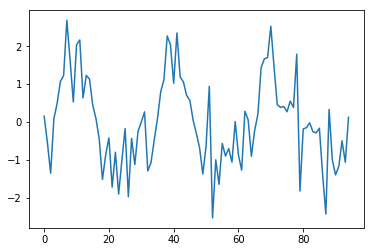

In [50]:
plt.plot(val

In [93]:
times

array([-250., -249., -248., -247., -246., -245., -244., -243., -242.,
       -241., -240., -239., -238., -237., -236., -235., -234., -233.,
       -232., -231., -230., -229., -228., -227., -226., -225., -224.,
       -223., -222., -221., -220., -219., -218., -217., -216., -215.,
       -214., -213., -212., -211., -210., -209., -208., -207., -206.,
       -205., -204., -203., -202., -201., -200., -199., -198., -197.,
       -196., -195., -194., -193., -192., -191., -190., -189., -188.,
       -187., -186., -185., -184., -183., -182., -181., -180., -179.,
       -178., -177., -176., -175., -174., -173., -172., -171., -170.,
       -169., -168., -167., -166., -165., -164., -163., -162., -161.,
       -160., -159., -158., -157., -156., -155., -154., -153., -152.,
       -151., -150., -149., -148., -147., -146., -145., -144., -143.,
       -142., -141., -140., -139., -138., -137., -136., -135., -134.,
       -133., -132., -131., -130., -129., -128., -127., -126., -125.,
       -124., -123.,

In [96]:
np.where(times == t)[0][0]

365